<a href="https://colab.research.google.com/github/maxidiazbattan/Covid-vaccination-LA/blob/main/Covid_vaccinations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install geopandas --upgrade --quiet

     |████████████████████████████████| 1.0MB 5.1MB/s 
     |████████████████████████████████| 6.6MB 15.9MB/s 
     |████████████████████████████████| 15.4MB 237kB/s 


In [ ]:
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
import io
import json
import geopandas as gpd


In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Set standard notation instead scientific

In [4]:
# Downloading the csv file from the OWID GitHub account
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv" 
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [5]:
# Downloading the csv file with the latitude and longitude of the world countries for a future choropleth map
lat_long = pd.read_html ('https://developers.google.com/public-data/docs/canonical/countries_csv')

In [8]:
lat_long = np.array(lat_long)

In [9]:
lat_long = lat_long.reshape(-1, 4)

In [10]:
df_lat_long = pd.DataFrame(lat_long, columns = ['country', 'latitude', 'longitude', 'location'])

In [11]:
df['date'] = pd.to_datetime (df['date'])

In [12]:
df['month'] = df['date'].dt.month

In [13]:
df['year'] = df['date'].dt.year

In [14]:
df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,month,year
0,Afghanistan,AFG,2021-02-22,0.00,0.00,nan,nan,nan,0.00,0.00,nan,nan,2,2021
1,Afghanistan,AFG,2021-02-23,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00,2,2021
2,Afghanistan,AFG,2021-02-24,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00,2,2021
3,Afghanistan,AFG,2021-02-25,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00,2,2021
4,Afghanistan,AFG,2021-02-26,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00,2,2021


In [16]:
# Grouping countries by location
df_loc = df.groupby('location', as_index = False).mean()

In [17]:
df_loc.sample(5)

,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,month,year
60,Egypt,1559643.54,1334765.15,324824.33,83390.33,23137.74,1.52,1.30,0.32,225.93,3.55,2021.00
106,Kazakhstan,2245876.36,1557719.48,720926.26,69413.52,26894.07,11.96,8.30,3.84,1432.33,3.72,2021.00
84,Guatemala,225225.58,207542.71,22285.26,7163.45,5870.86,1.26,1.16,0.12,327.68,4.11,2021.00
26,Bonaire Sint Eustatius and Saba,7391.00,5726.00,1665.00,nan,nan,28.19,21.84,6.35,nan,4.00,2021.00
78,Germany,17576129.05,12840975.62,4809639.28,357668.24,341065.41,20.98,15.33,5.74,4070.79,3.46,2020.97


In [18]:
la_countries = ['Argentina', 'Brazil', 'Bolivia', 'Chile', 'Colombia', 'Uruguay', 'Paraguay', 'Peru', 'Ecuador', 'Mexico']

In [19]:
# Checking if the countries on la_countries list, are present in the dataframe by a simple list comprehension
[country for country in df_loc['location'] if country in la_countries] 

['Argentina',
 'Bolivia',
 'Brazil',
 'Chile',
 'Colombia',
 'Ecuador',
 'Mexico',
 'Paraguay',
 'Peru',
 'Uruguay']

In [20]:
df_la = df[df['location'].isin(la_countries)]

In [21]:
df_lat_long[df_lat_long['location'].isin(la_countries)]

,country,latitude,longitude,location
10,AR,-38.42,-63.62,Argentina
27,BO,-16.29,-63.59,Bolivia
28,BR,-14.24,-51.93,Brazil
43,CL,-35.68,-71.54,Chile
46,CO,4.57,-74.30,Colombia
59,EC,-1.83,-78.18,Ecuador
153,MX,23.63,-102.55,Mexico
170,PE,-9.19,-75.02,Peru
182,PY,-23.44,-58.44,Paraguay
228,UY,-32.52,-55.77,Uruguay


In [22]:
df_la_group = df_la.groupby('location', as_index = False).mean().sort_values (by = 'people_fully_vaccinated_per_hundred', ascending = False)

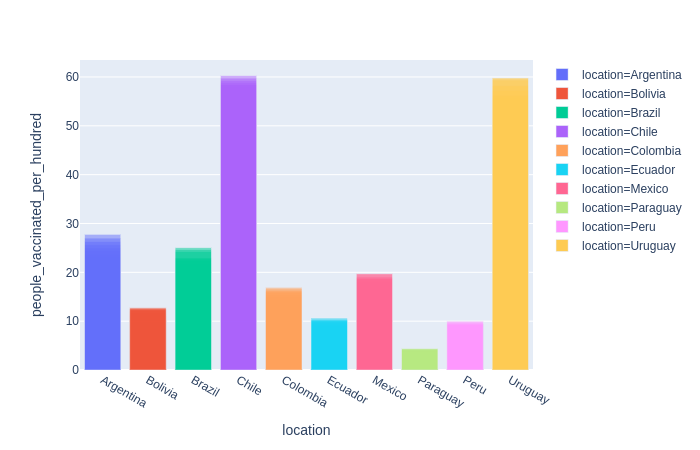

In [49]:
# Plotting the people vaccinated per hundred in latin american countries
g1 = px.bar (data_frame = df_la, x = 'location', y = 'people_vaccinated_per_hundred', color = 'location', barmode = 'overlay')
g1.show('png')

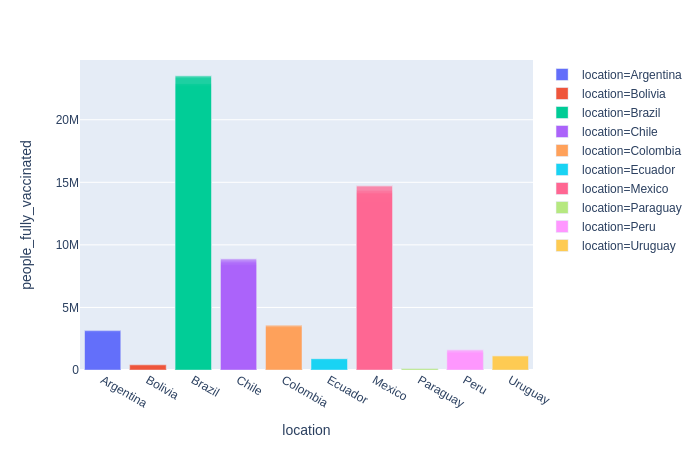

In [50]:
# People fully vaccinated in millions in latin american countries
g2 = px.bar (data_frame = df_la, x = 'location', y = 'people_fully_vaccinated', color = 'location', barmode = 'overlay')
g2.show('png')

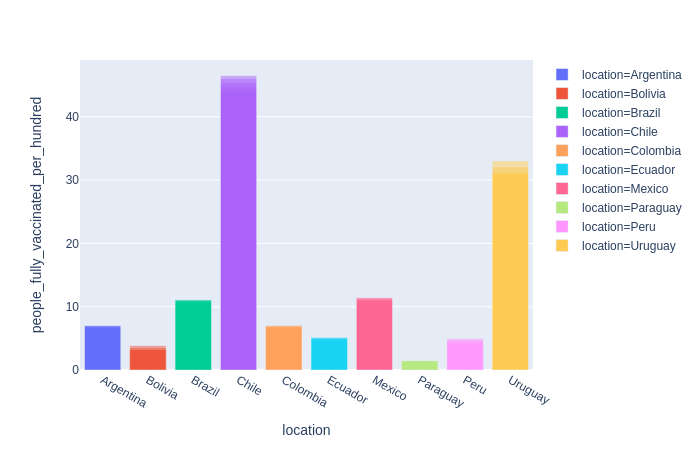

In [51]:
# People fully vaccinated per hundred in latin american countries
g3 = px.bar (data_frame = df_la, x = 'location', y = 'people_fully_vaccinated_per_hundred', color = 'location', barmode = 'overlay')
g3.show('png')

In [27]:
# Merging the data frames (df_la_group & df_lat_long) for a plotting purpouse
merge_dfs = pd.merge(df_la_group, df_lat_long, on = 'location' ) 
merge_dfs.head()

,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,month,year,country,latitude,longitude
0,Chile,8152112.38,4971576.15,3615196.90,120375.32,117506.46,42.65,26.01,18.91,6146.94,3.62,2020.95,CL,-35.68,-71.54
1,Uruguay,1454807.04,987114.34,654769.77,30996.42,30109.59,41.88,28.42,18.85,8667.82,4.17,2021.00,UY,-32.52,-55.77
2,Brazil,25532727.30,18156477.65,8796125.29,505463.81,506087.60,12.01,8.54,4.14,2380.95,3.44,2021.00,BR,-14.24,-51.93
3,Mexico,9887814.12,7463352.01,4102904.28,219686.17,208442.92,7.67,5.79,3.18,1616.68,3.62,2020.95,MX,23.63,-102.55
4,Colombia,3913091.40,3524050.37,1579248.04,100215.22,103897.81,7.69,6.93,3.10,2041.97,3.95,2021.00,CO,4.57,-74.30


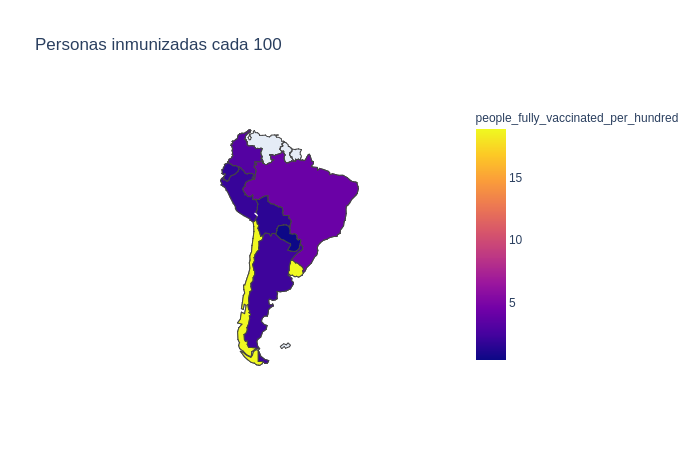

In [53]:
# A choropleth map for LA 
g4 = px.choropleth ( data_frame = merge_dfs, locations = 'location', locationmode = 'country names', color = 'people_fully_vaccinated_per_hundred', scope = 'south america', title = 'Personas inmunizadas cada 100')
g4.show('png')